<a href="https://colab.research.google.com/github/auranyas/UAS-DATASCIENCE/blob/main/UAS_DATASCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Load data
df = pd.read_csv('Campus Recruitment.csv')

# 2. Bersihkan data yang kosong (Imputasi)
df['Nilai rata-rata SMP'] = df['Nilai rata-rata SMP'].fillna(df['Nilai rata-rata SMP'].median())
df['Nilai rata-rata SMA'] = df['Nilai rata-rata SMA'].fillna(df['Nilai rata-rata SMA'].median())
df['Nilai tes kemampuan kerja'] = df['Nilai tes kemampuan kerja'].fillna(df['Nilai tes kemampuan kerja'].median())

# 3. Ubah teks menjadi angka (Encoding)
df_encoded = df.drop(columns=['ID', 'Gaji']) # Gaji dibuang karena hanya ada jika sudah 'Placed'
le = LabelEncoder()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

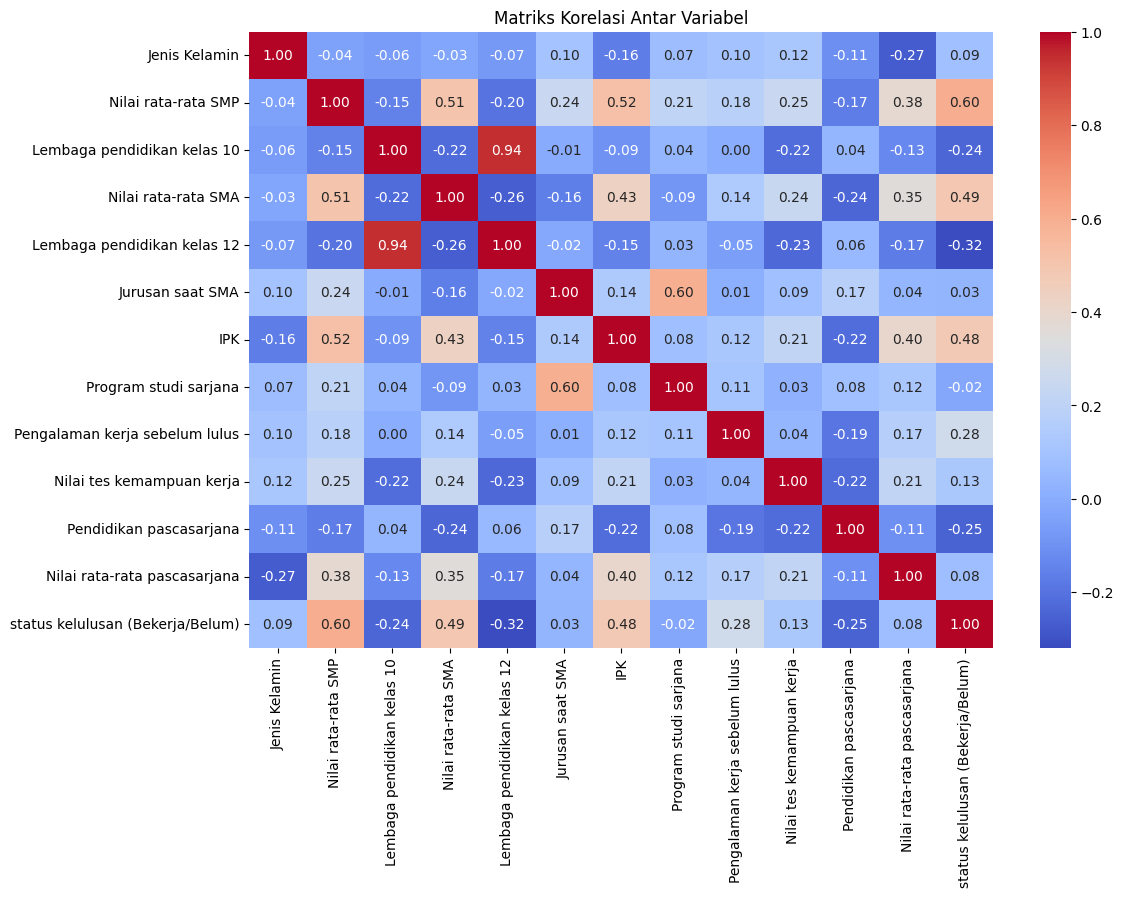

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi
korelasi = df_encoded.corr()

# Membuat Heatmap (Peta Panas)
plt.figure(figsize=(12, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

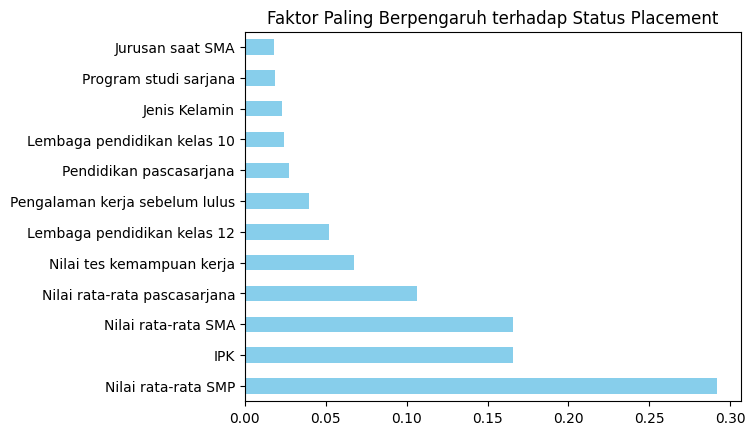

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Pisahkan Fitur (X) dan Target (y)
X = df_encoded.drop('status kelulusan (Bekerja/Belum)', axis=1)
y = df_encoded['status kelulusan (Bekerja/Belum)']

# Bangun Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Ambil tingkat kepentingan fitur
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Visualisasi
importances.plot(kind='barh', color='skyblue')
plt.title('Faktor Paling Berpengaruh terhadap Status Placement')
plt.show()